In [3]:
import time
import pandas as pd
import matplotlib.pyplot as plt

from selenium import webdriver
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager

# Web scrap characters by ethnicity

In [141]:
# Create driver
driver = webdriver.Chrome(ChromeDriverManager().install())

# Go to ethnicity web page from the coppermind wiki
url = "https://coppermind.net/wiki/Category:Rosharans"
driver.get(url)

# Accept spoiler warning
time.sleep(3)
driver.find_element(By.XPATH, '//button[text()="Proceed"]').click()

# Find all ethnicities
ethnicities_elements = driver.find_elements(By.CSS_SELECTOR, 'a[title^="Category:"]')
ethnicities_elements.pop(0)
ethnicities_elements = ethnicities_elements[0:-2]

# Create an array with the ethnicities and urls
ethnicities = []
for ethnicity in ethnicities_elements:
    ethnicity_url = ethnicity.get_attribute('href')
    ethnicity_name = ethnicity.text
    ethnicities.append({'ethnicity_name': ethnicity_name, 'url': ethnicity_url})

C:\Users\mnovella\AppData\Local\Temp\5\ipykernel_25756\2128097971.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())


In [142]:
ethnicities

[{'ethnicity_name': 'Aimians',
  'url': 'https://coppermind.net/wiki/Category:Aimians'},
 {'ethnicity_name': 'Alethi',
  'url': 'https://coppermind.net/wiki/Category:Alethi'},
 {'ethnicity_name': 'Azish',
  'url': 'https://coppermind.net/wiki/Category:Azish'},
 {'ethnicity_name': 'Emuli',
  'url': 'https://coppermind.net/wiki/Category:Emuli'},
 {'ethnicity_name': 'Herdazians',
  'url': 'https://coppermind.net/wiki/Category:Herdazians'},
 {'ethnicity_name': 'Iriali',
  'url': 'https://coppermind.net/wiki/Category:Iriali'},
 {'ethnicity_name': 'Kharbranthians',
  'url': 'https://coppermind.net/wiki/Category:Kharbranthians'},
 {'ethnicity_name': 'Listeners',
  'url': 'https://coppermind.net/wiki/Category:Listeners'},
 {'ethnicity_name': 'Natan',
  'url': 'https://coppermind.net/wiki/Category:Natan'},
 {'ethnicity_name': 'Purelakers',
  'url': 'https://coppermind.net/wiki/Category:Purelakers'},
 {'ethnicity_name': 'Reshi',
  'url': 'https://coppermind.net/wiki/Category:Reshi'},
 {'ethnicit

In [143]:
characters_list = []

for ethnicity in ethnicities:
    driver.get(ethnicity['url'])

    characters = driver.find_elements(By.CSS_SELECTOR, 'a[title]')
    characters = characters[2:-1]
    characters = characters[0:-20]

    for char in characters:
        characters_list.append({'ethnicity': ethnicity['ethnicity_name'], 'character': char.text})

In [156]:
character_df = pd.DataFrame(characters_list)
character_df.head()

,ethnicity,character
0,Aimians,Arclomedarian
1,Aimians,Axies
2,Aimians,Yelamaiszin
3,Alethi,Abry
4,Alethi,Acis


In [158]:
!mkdir characters
character_df.to_csv('./characters/characters.csv', index=False)

In [31]:
character_df = pd.read_csv('./characters/characters.csv')
character_df.head()

,ethnicity,character
0,Aimians,Arclomedarian
1,Aimians,Axies
2,Aimians,Yelamaiszin
3,Alethi,Abry
4,Alethi,Acis


In [32]:
value_counts = character_df.character.value_counts()
value_counts_df = pd.DataFrame({'value': value_counts.index, 'count': value_counts.values}).reset_index(drop=True)

# Filter the original DataFrame based on count > 1b
filtered_df = character_df.loc[character_df['character'].isin(value_counts_df.loc[value_counts_df['count'] > 1, 'value'])]

In [33]:
pd.set_option('display.max_rows', None)
filtered_df

,ethnicity,character
0,Aimians,Arclomedarian
2,Aimians,Yelamaiszin
67,Alethi,Havarah
199,Alethi,Ton (singer)
207,Alethi,Vaceslv
242,Herdazians,Havarah
253,Kharbranthians,Artmyrn
261,Listeners,Roshar
263,Listeners,Abronai
264,Listeners,Altoki


In [34]:
character_df = character_df[~character_df['character'].isin(['Roshar', 'Unkalaki', 'Natanatan', 'Herdazian', 'Horneater', 'Truthless', character_df['ethnicity'].unique()])]

In [35]:
character_df.to_csv('./characters/characters.csv', index=False)

In [36]:
df = pd.read_csv('./characters/characters.csv')
df[df['character'] == 'Roshar']

,ethnicity,character


# Visualiza character count by ethnicity

<function matplotlib.pyplot.show(close=None, block=None)>

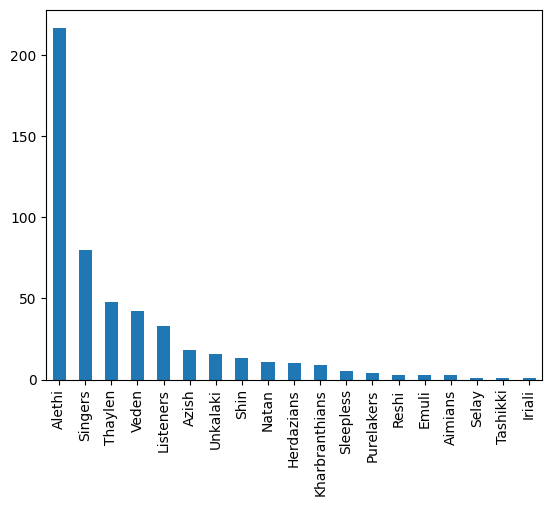

In [148]:
character_df.ethnicity.value_counts().plot(kind="bar")
plt.show